<a href="https://colab.research.google.com/github/asiftandel96/DS-Use-Cases/blob/main/Hotel_Booking_Demand_Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=8c09229d8e11bf94af2faa47ea070b4fac36d1b074892a1cd6b0823466b8c62e
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
import pyforest

In [ ]:
# Read the File from the local directory
df=pd.read_csv('/content/sample_data/hotel_bookings.csv')

<IPython.core.display.Javascript object>

In [ ]:
#Checking the first five rows of the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Check the columns of the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Context


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!


Content


This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things


In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.shape

(119390, 32)

In [ ]:
df_num=df.select_dtypes(include=('int64','float64'))

In [ ]:
len(df_num.columns)

20

In [ ]:
df_categorical=df.select_dtypes(include=['O'])

In [ ]:
len(df_categorical.columns)

12

In [ ]:
# Checking the missing values in the dataset
df_num.isnull().mean()

is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
dtype: float64

In [ ]:
df_num.drop(['company'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_categorical.isnull().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [ ]:
df_categorical.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # -*- coding: utf-8 -*-


In [ ]:
df_categorical.isnull().sum()

hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
df[['market_segment','customer_type']].value_counts().head()

market_segment  customer_type  
Online TA       Transient          51299
Offline TA/TO   Transient          14054
Direct          Transient          11336
Groups          Transient-Party    10633
                Transient           8427
dtype: int64

In [ ]:
df[['country','market_segment','customer_type','arrival_date_month','deposit_type']].value_counts().head(20)

country  market_segment  customer_type    arrival_date_month  deposit_type
PRT      Online TA       Transient        August              No Deposit      1673
                                          July                No Deposit      1544
         Groups          Transient        May                 Non Refund      1125
ESP      Online TA       Transient        August              No Deposit      1062
FRA      Online TA       Transient        August              No Deposit       952
PRT      Offline TA/TO   Transient        June                Non Refund       938
         Groups          Transient        April               Non Refund       921
         Online TA       Transient        June                No Deposit       888
         Groups          Transient        September           Non Refund       878
         Direct          Transient        August              No Deposit       864
         Online TA       Transient        March               No Deposit       825
         Gro

In [ ]:
df.groupby(['country','arrival_date_month','deposit_type'])['days_in_waiting_list'].agg('min').sort_values().head()

country  arrival_date_month  deposit_type
ABW      June                No Deposit      0
MYS      November            No Deposit      0
         May                 No Deposit      0
         March               No Deposit      0
         January             No Deposit      0
Name: days_in_waiting_list, dtype: int64

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df.groupby(['arrival_date_month','deposit_type']).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72142,City Hotel,1,61,2017,July,29,22,1,1,2,0.0,0,BB,USA,Direct,Direct,0,0,0,D,D,0,Refundable,14.0,NaN,0,Transient,139.50,0,0,Canceled,2017-07-21
72532,City Hotel,1,13,2017,July,31,30,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,Refundable,9.0,NaN,0,Transient,162.67,0,2,Canceled,2017-07-27
72538,City Hotel,1,171,2017,July,31,30,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,Refundable,10.0,NaN,0,Transient,100.00,0,0,Canceled,2017-07-29
72620,City Hotel,1,132,2017,August,31,1,0,4,2,1.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,Refundable,8.0,NaN,0,Transient,209.70,0,0,Canceled,2017-07-28


In [ ]:
df['adr'].dtypes

dtype('float64')

In [ ]:
  # What is the best time of the year to book a hotel is:(January,February,November)
  #No Deposit UpFront
  #less waiting time.
  df.groupby(['arrival_date_month','deposit_type'])[['adr','days_in_waiting_list']].agg('mean').sort_values('deposit_type')

,,adr,days_in_waiting_list
arrival_date_month,deposit_type,,
April,No Deposit,102.018452,2.261153
September,No Deposit,107.452580,4.324482
August,No Deposit,144.707770,0.347786
October,No Deposit,89.214662,3.196621
December,No Deposit,81.530676,1.987805
November,No Deposit,72.497639,1.566711
February,No Deposit,73.975380,0.102238
January,No Deposit,69.901846,1.206591
May,No Deposit,108.785306,2.762910


In [ ]:
#Or the optimal length of stay in order to get the best daily rate?
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.groupby('arrival_date_month')['lead_time','adr'].agg('mean').sort_values('lead_time')

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # -*- coding: utf-8 -*-


,lead_time,adr
arrival_date_month,,
January,45.310002,70.361241
February,47.859569,73.582276
March,70.119257,80.679646
December,73.561357,81.076776
November,76.580807,73.794962
April,94.822888,100.380790
May,117.646171,108.695516
August,121.137710,140.111523
October,122.994624,87.908879


<IPython.core.display.Javascript object>

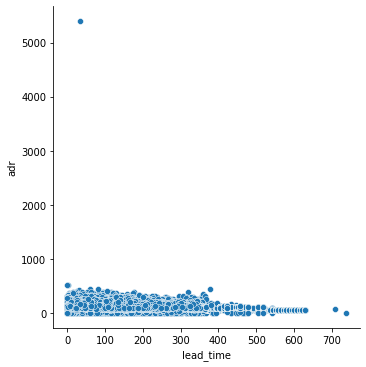

In [ ]:
sns.relplot(x=df['lead_time'],y=df['adr'])

In [ ]:
df.groupby(['arrival_date_day_of_month'])['adr'].agg('mean').sort_values().head()

arrival_date_day_of_month
5     95.630030
12    96.917612
3     97.980833
2     98.190984
4     98.460050
Name: adr, dtype: float64

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.groupby('reservation_status_date')['adr'].agg('mean').sort_values().head()

reservation_status_date
2014-11-18    0.00000
2015-01-18    0.00000
2015-03-23    3.00000
2015-02-26    8.00000
2015-01-02    9.63375
Name: adr, dtype: float64

In [ ]:
df['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [ ]:
df[df['reservation_status']=='Check-Out'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.groupby(['reservation_status','arrival_date_month'])['adr'].agg('mean').sort_values()

reservation_status  arrival_date_month
Check-Out           January                67.001050
                    November               70.505169
No-Show             February               71.396026
Check-Out           February               72.419429
No-Show             January                72.612267
                    December               74.960244
                    November               76.197436
Canceled            February               76.317365
Check-Out           March                  77.331574
Canceled            January                78.260710
Check-Out           December               78.920238
Canceled            November               81.222808
No-Show             March                  85.314590
Canceled            December               85.449747
Check-Out           October                86.830198
Canceled            March                  87.842669
                    October                89.576441
No-Show             October                94.748082
Check-O

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

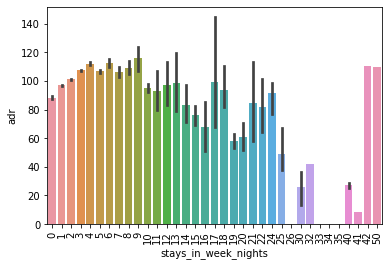

In [ ]:
#'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 
#'stays_in_weekend_nights','stays_in_week_nights'

sns.barplot(x=df['stays_in_week_nights'],y=df['adr'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

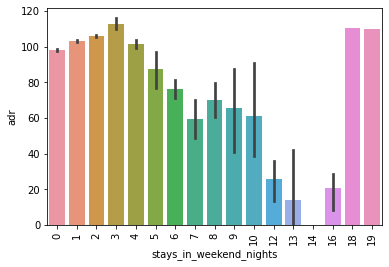

In [ ]:
sns.barplot(x=df['stays_in_weekend_nights'],y=df['adr'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby(['stays_in_week_nights','stays_in_weekend_nights'])['adr'].agg('mean').head(60)

stays_in_week_nights  stays_in_weekend_nights
0                     0                            0.000000
                      1                           95.468188
                      2                          100.950224
1                     0                           94.483820
                      1                           96.756630
                      2                          102.636616
2                     0                           97.693070
                      1                          105.677349
                      2                          103.915467
3                     0                          106.166288
                      1                          105.152237
                      2                          112.922050
4                     0                          106.307914
                      1                          114.190638
                      2                          119.405373
5                     0                          112.0

In [ ]:
# Filter out the number of people who have stay_in_week_nights more than 40
df[df['stays_in_week_nights']>40]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
101794,City Hotel,0,140,2016,September,39,22,16,41,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,K,12,No Deposit,9.0,NaN,0,Transient,8.34,0,2,Check-Out,2016-11-18


In [ ]:
# Filter out the no of people who stayed in weekend nights more than 17 times
# Two records are similar in stay_in_week_nights and stay_in_weekend_nights Interesting Result!!!!!
df[df['stays_in_weekend_nights']>17]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.5,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.0,0,3,Check-Out,2016-09-12


In [ ]:
#What if you wanted to predict whether or not a hotel was likely to 
#receive a disproportionately high number of special requests?
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
df.groupby(['hotel','arrival_date_month'])['total_of_special_requests'].agg('mean').sort_values(ascending=False)

hotel         arrival_date_month
Resort Hotel  August                0.906620
              July                  0.780888
              June                  0.674548
City Hotel    August                0.644106
Resort Hotel  December              0.629154
City Hotel    July                  0.610040
              December              0.604308
Resort Hotel  January               0.587779
City Hotel    November              0.585495
Resort Hotel  November              0.573656
              September             0.571750
              May                   0.551278
              February              0.543345
City Hotel    April                 0.536765
              May                   0.524538
              January               0.523822
              March                 0.522453
              June                  0.521282
              February              0.514602
              October               0.498882
Resort Hotel  April                 0.489886
              October 

In [ ]:
# What if you want to predict whether or not a hotel was likely to receive a dispropriately  high
#no of special request

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Checking the feature of  total_of_special_requests
df['total_of_special_requests'].value_counts(normalize=True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

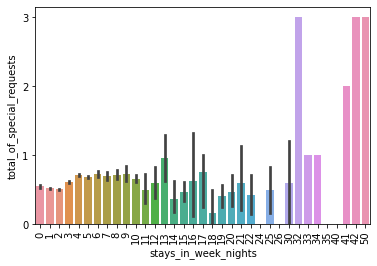

In [ ]:
sns.barplot(x=df['stays_in_week_nights'],y=df['total_of_special_requests'])
plt.yticks(np.arange(0,4))
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

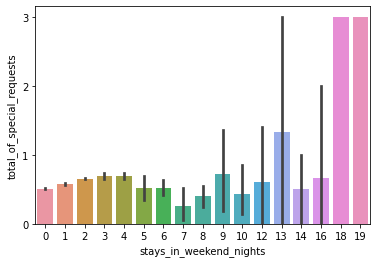

In [ ]:
sns.barplot(x=df['stays_in_weekend_nights'],y=df['total_of_special_requests'])
plt.yticks(np.arange(0,4))
plt.show()

<IPython.core.display.Javascript object>

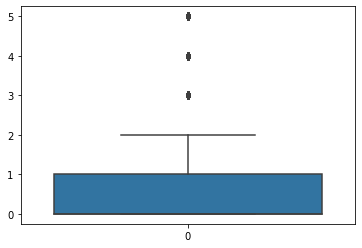

In [ ]:
# Check if there are outliers in the feature (total_of_special_requests)
sns.boxplot(data=df['total_of_special_requests'])

In [ ]:
# Check IQR of total_of_special_requests
IQR=df.total_of_special_requests.quantile(0.75) - df.total_of_special_requests.quantile(0.25)
IQR

1.0

In [ ]:
lower_bridge=df.total_of_special_requests.quantile(0.25) - (1.5*IQR)
upper_bridge=df.total_of_special_requests.quantile(0.75) + (1.5*IQR)
print(lower_bridge)
print(upper_bridge)

-1.5
2.5


In [ ]:
# Checking lower_extreme and high extreme values
lower_extreme=df.total_of_special_requests.quantile(0.25) - 3*df.total_of_special_requests.std()
upper_extreme=df.total_of_special_requests.quantile(0.75) + 3*df.total_of_special_requests.std()
print(lower_extreme)
print(upper_extreme)

-2.3783952684268743
3.3783952684268743


In [ ]:
len(df[df['total_of_special_requests']>3.37])

380

In [ ]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
df.groupby(['customer_type','arrival_date_month','total_of_special_requests'])['adr'].agg('mean').sort_values()

customer_type    arrival_date_month  total_of_special_requests
Contract         February            2                             39.410000
Transient        February            5                             39.600000
Group            January             4                             44.000000
                                     1                             47.428182
                 February            1                             49.770625
                                                                     ...    
                 July                3                            173.100000
Transient        August              3                            175.910926
Group            July                2                            190.000000
Transient        August              5                            199.241429
Transient-Party  August              4                            247.965455
Name: adr, Length: 228, dtype: float64

In [ ]:
df.groupby(['arrival_date_month','total_of_special_requests'])['adr'].agg('mean').sort_values().head(50)

arrival_date_month  total_of_special_requests
February            5                             39.600000
March               5                             63.000000
January             0                             68.582206
November            0                             69.441354
January             1                             70.643102
February            0                             71.046170
                    1                             74.966921
January             2                             76.083977
December            0                             77.435280
November            4                             77.642000
March               0                             78.112738
November            1                             78.436818
February            4                             78.867333
November            2                             82.433660
February            2                             82.541054
October             0                             83.1

 The total_of_special requests with average daily rate is 
directly proportional to season. If It is off-season
such as   January,February the price will be low even if we have made special request greater than 2 But If it is peak
season then price will be high with special request 

In [ ]:
# Converting all the dtypes to its precised datatype
df_num.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [ ]:
#One Question T